# 코드 예시) Random 함수 


In [10]:
import random

In [109]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random()) 
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30)) 
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]



0.28125859914369356
12.25478166043246
122
5
[1, 'banna', 'apple']
['apple', 2, 1]
['apple', 1, 2, 4, 'banna']


# 실습1. 난수 히스토그램 그리기 (Python Random module)


In [11]:
# import packages
import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

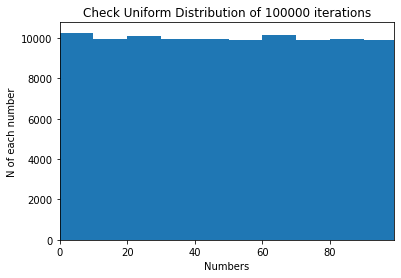

In [ ]:
# 100번 수행
num_iterations = 100000
random_integers = []

for _ in range(num_iterations) : 
  random_integers.append(random.uniform(0, 100))


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨 
  - m이 4의 배수면 a-1도 4의 배수

In [12]:
def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        # write answer
        seed = (a * seed + c) % m
        yield seed

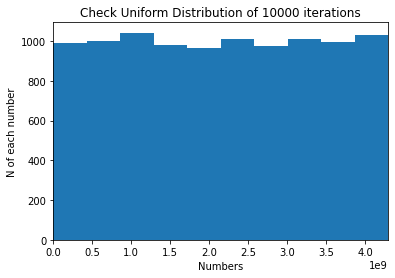

In [18]:
num_iterations = 10000
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []

for num in random_generator : 
  random_integers.append(num)

fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 2**32])
plt.show()

# 실습 3. 주사위 합이 8인 경우

In [19]:
# 출력시 컬러 지원 가능 모듈 설치
!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
def roll_dice():
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    
    return (dice1, dice2)
    pass

In [42]:
dice_tries = []
num_iterations = 100
hits = 0
for _ in range(num_iterations): 
    dice1, dice2 = roll_dice()
    dice_tries.append(roll_dice())
    pass
print("="*100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))

for i in range(num_iterations): 
  sum = dice_tries[i][0] + dice_tries[i][1]
  if sum == 8 : 
    hits += 1
    print(Back.CYAN + Fore.YELLOW + "try {0:3d} : {1} {2}".format(i, dice_tries[i][0], dice_tries[i][1]), end="" + Style.RESET_ALL)
    print(" ", end="")
  else : 
    print("try {0:3d} : {1} {2}".format(i, dice_tries[i][0], dice_tries[i][1]), end=" ")
  if i % 5 == 4 : 
    print()
  pass


print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations,6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("="*100)


* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try   0 : 1 6 try   1 : 4 1 try   2 : 2 1 try   3 : 5 2 try   4 : 1 5 
try   5 : 5 2 try   6 : 3 1 try   7 : 2 1 try   8 : 4 4 try   9 : 5 5 
try  10 : 3 2 try  11 : 1 1 try  12 : 6 5 try  13 : 5 5 try  14 : 2 5 
try  15 : 3 5 try  16 : 6 6 try  17 : 5 1 try  18 : 6 2 try  19 : 5 3 
try  20 : 5 3 try  21 : 5 6 try  22 : 2 3 try  23 : 4 6 try  24 : 6 6 
try  25 : 3 3 try  26 : 3 1 try  27 : 2 2 try  28 : 6 2 try  29 : 6 2 
try  30 : 3 3 try  31 : 2 2 try  32 : 5 5 try  33 : 3 4 try  34 : 4 6 
try  35 : 4 2 try  36 : 5 6 try  37 : 2 2 try  38 : 1 4 try  39 : 6 2 
try  40 : 4 5 try  41 : 3 4 try  42 : 5 2 try  43 : 6 2 try  44 : 1 6 
try  45 : 5 5 try  46 : 2 6 try  47 : 2 2 try  48 : 4 4 try  49 : 5 1 
try  50 : 3 3 try  51 : 4 4 try  52 : 2 3 try  53 : 5 3 try  54 : 4 4 
try  55 : 6 6 try  56 : 4 3 try  57 : 2 1 try  58 : 6 5 try  59 : 1 5 
try  60 : 2 3 try  61 : 4 4 try  62 : 2 5 try  63 : 3 5 try  64 : 3 4 
try  65 : 4 4 try  66 : 6 1 try  67 

# 실습 4. 주사위 게임

In [58]:
def roll_dice():
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    
    if dice1 == dice2 : 
      return 1
    else :
      return 0
    pass

In [77]:
# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1


win_probability = []
end_balance = []
hist_balance = []

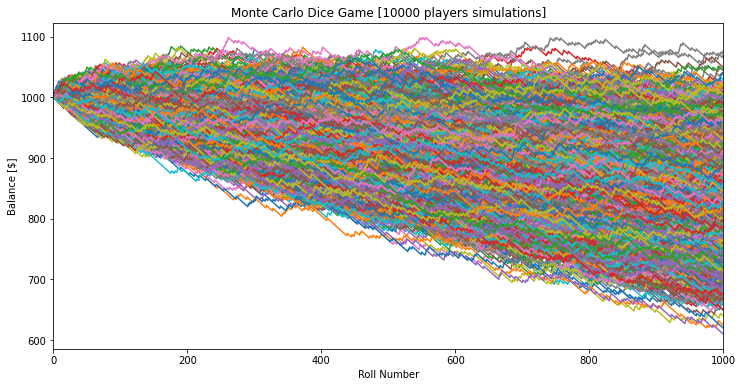

In [80]:
import numpy as np
plt.figure(figsize=(12,6))

for i in range(num_simulations):
    balance = 1000
    win = 0
    hist = []
    for j in range(max_num_rolls) : 
      hist.append(balance)
      if roll_dice() == 1 : 
        balance += bet * 4
        win += 1
      else : 
        balance -= bet
    win_probability.append(win / max_num_rolls)
    end_balance.append(balance)
    hist.append(balance)
    hist_balance.append(hist)
    continue
for _ in range(num_simulations) : 
  plt.plot(hist_balance[_])
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " players simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])
plt.show()

In [81]:
overall_win_probability = np.mean(win_probability)
overall_end_balance = np.mean(end_balance)

print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 승률" + "  :  " + colored(f"{overall_win_probability:.2f}","red"))
print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 잔액 "  + f" : {colored('$','red')}" + colored(f"{overall_end_balance:.2f}","red"))

10000명 플레이어의 1000번 수행 횟수 시 평균 승률  :  0.17
10000명 플레이어의 1000번 수행 횟수 시 평균 잔액  : $833.65


# 실습 5. 원주율 구하기

# 초기 세팅

(-2.0, 2.0)

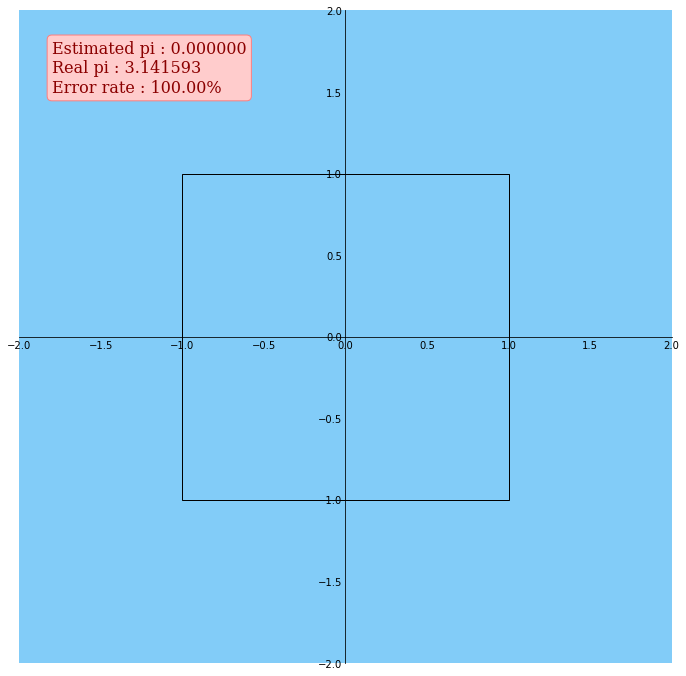

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.5, f"Estimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# pi 추측

(-2.0, 2.0)

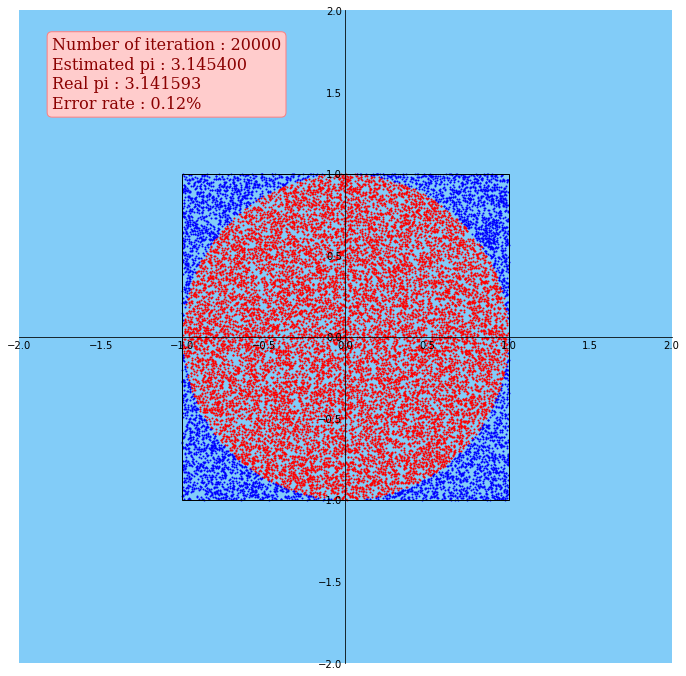

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 20000
x_coords = []
y_coords = []
in_x = []
in_y = []
out_x = []
out_y = []

## write answer
for _ in range(MAX_POINTS) : 
  x_coords.append(random.uniform(-1, 1))
  y_coords.append(random.uniform(-1, 1))
  if x_coords[_] ** 2 + y_coords[_] ** 2 <= 1 : 
    in_x.append(x_coords[_])
    in_y.append(y_coords[_])
  else : 
    out_x.append(x_coords[_])
    out_y.append(y_coords[_])

  pi = len(in_x) / MAX_POINTS * 4
##



plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
# ax.scatter 이용
ax.scatter(in_x, in_y, 1, c="red")
ax.scatter(out_x, out_y, 1, c="blue")

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 정확도를 0.1% 미만으로 만들어 보기 

(-2.0, 2.0)

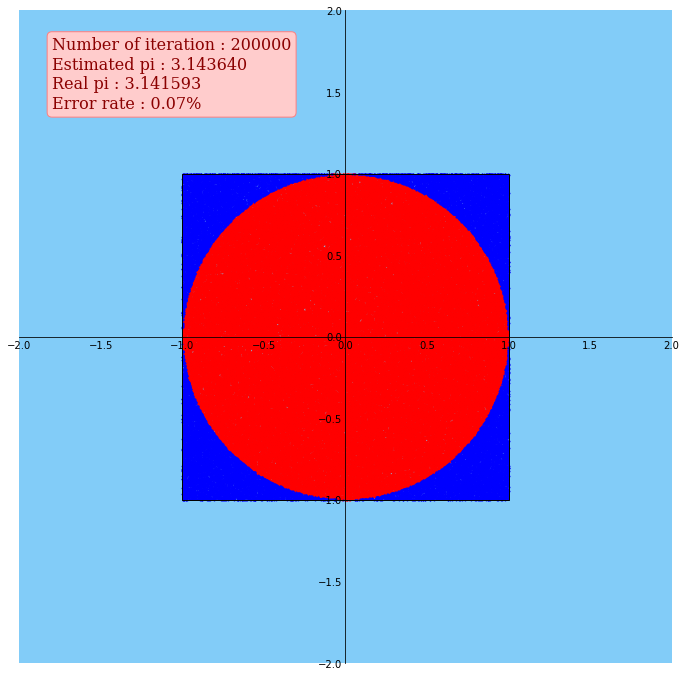

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# TODO

MAX_POINTS = 200000
x_coords = []
y_coords = []
in_x = []
in_y = []
out_x = []
out_y = []

## write answer
for _ in range(MAX_POINTS) : 
  x_coords.append(random.uniform(-1, 1))
  y_coords.append(random.uniform(-1, 1))
  if x_coords[_] ** 2 + y_coords[_] ** 2 <= 1 : 
    in_x.append(x_coords[_])
    in_y.append(y_coords[_])
  else : 
    out_x.append(x_coords[_])
    out_y.append(y_coords[_])

  pi = len(in_x) / MAX_POINTS * 4
##



plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
# ax.scatter 이용
ax.scatter(in_x, in_y, 1, c="red")
ax.scatter(out_x, out_y, 1, c="blue")

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 실습 6. 계약 손익 예측

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시뮬레이션 횟수
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    ## write answer
    sales = np.random.triangular(left = 1, right = 9, mode = 3)
    if random.randint(0, 1) == 1 : 
      # 매출상승
      sales = sales * np.random.triangular(left = 1.25, right = 1.75, mode = 1.5)
    else : 
      pass
    results.append(sales)

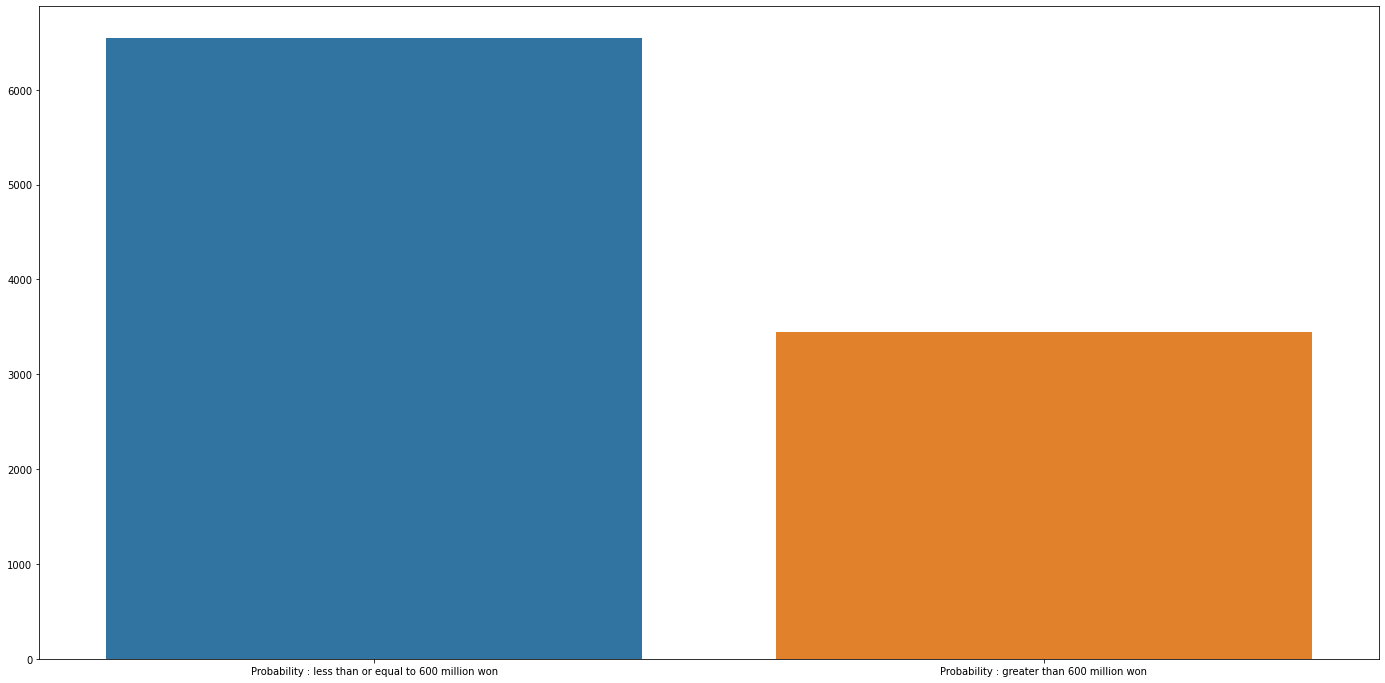

In [108]:
# 모든 시나리오에서 나온 신작 판매량의 평균 
average_sales = np.mean(results)

binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Probability : less than or equal to 600 million won",
    "Probability : greater than 600 million won"])

# 결과물 시각화
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)


In [107]:
C1 , C2 = binned_results.value_counts()
P1 = round(C1 * 100 / N_ROUNDS, 2)
P2 = round(C2 * 100 / N_ROUNDS, 2)

print("6억원 이하의 매출을 얻을 확률 :", colored(f"{P1}","red") )
print("6억원 초과의 매출을 얻을 확률 :", colored(f"{P2}","blue"))

6억원 이하의 매출을 얻을 확률 : 65.51
6억원 초과의 매출을 얻을 확률 : 34.49


# 실습 7 헬스장 수익 예측


In [112]:
import numpy as np
import seaborn as sns
from termcolor import colored

In [114]:
np.random.seed(1)
subscription_data = {"Month": range(1, 60), 
                     "Growth": np.random.normal(0, 0.05, 60)}

N_ROUNDS = 10000
results = []
historical_data = subscription_data["Growth"]
for rnd in range(N_ROUNDS):
  human = 2000
  money = 0
  for i in range(12) : 
    human *= 1 + historical_data[random.randint(0, 59)]
    money += human * 50000
  results.append(money)
    

# 99%의 신뢰도  
- 10000개의 수행 결과를 낮은 수익부터 순서대로 정렬하고 100번째(100/10000)번째의 수익을 확인

In [118]:

print("하위 1%의 수익 : ", colored(f"{sorted(results)[100] / 1e8:.4f} 억","red"))


## write answer
##
lower_revenue = sorted(results)[100]
print(f"매년 준비해야할 금액 : ",  colored(f"{(12*9.5*1e7 - lower_revenue)/1e8:.4f} 억","red"))

하위 1%의 수익 :  9.5749 억
매년 준비해야할 금액 :  1.8251 억


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


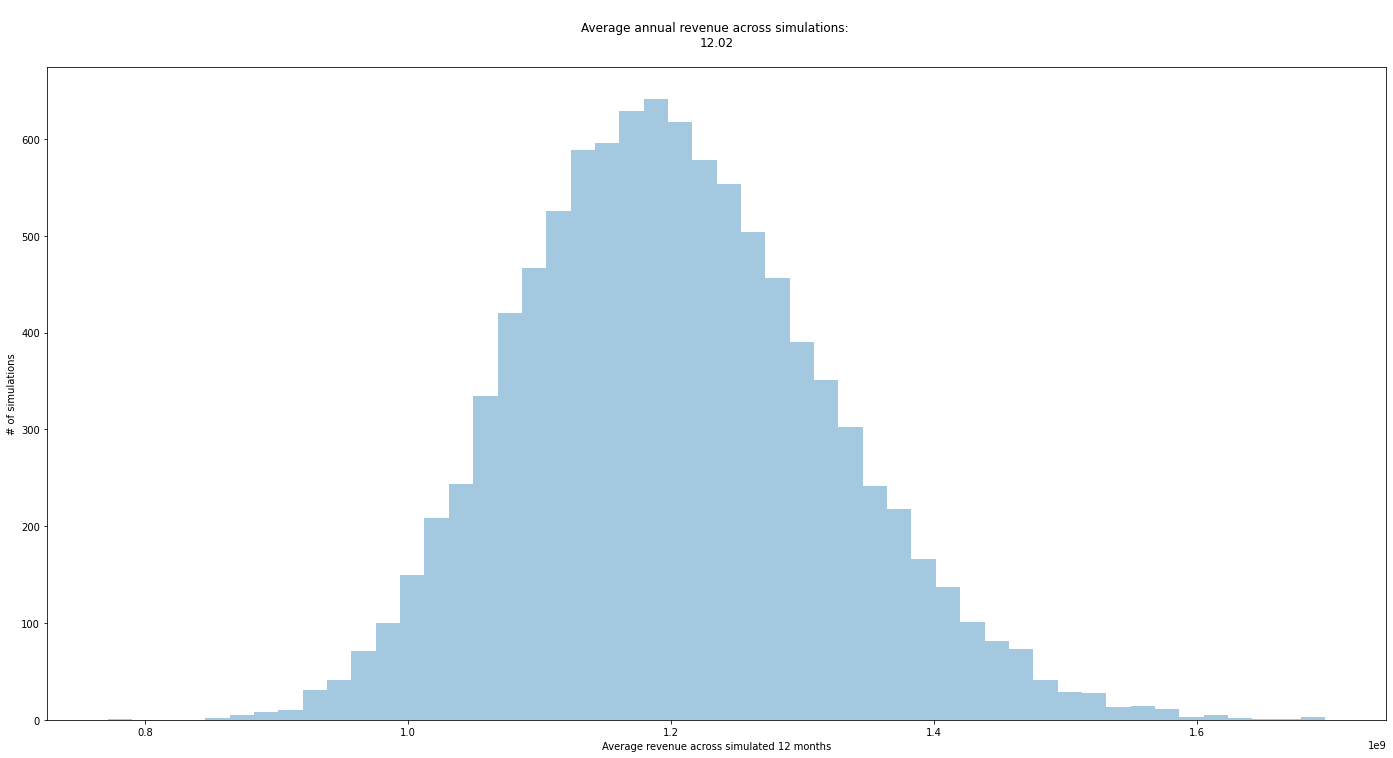

In [119]:
ax = sns.distplot(results, kde=False)
ax.set_xlabel("Average revenue across simulated 12 months")
ax.set_ylabel("# of simulations")
plt.title(f"""
Average annual revenue across simulations: 
{round(np.mean(results)/1e8, 2)}
""")
plt.show()